# 3 Tips for Connecting to Your First API
## Seattle Open City Data

<img src="images/seattle_open_data_header.png" alt="Seattle Open Data Header" width="500" align="left"/>

In this notebook, we'll connect to a few open datasets for Seattle (https://data.seattle.gov) using the Socrata Open Data (SODA) API. We'll cover filtering and querying with the SODA API, and then visualize the results.

## 1. How To Find The API Endpoint

<img src="images/find_api_endpoint.png" alt="Seattle Budget API Endpoint" width="700" align="left"/>

To grab the API endpoint, first navigate to a sample dataset that you're interesting in exploring. We'll use https://data.seattle.gov/dataset/City-of-Seattle-Operating-Budget/8u2j-imqx as an example. Then, in the upper right corner, click on the API button and copy the text in the API Endpoint box: https://data.seattle.gov/resource/8u2j-imqx.json. Several cities use Socrata, but if you're using a different API, your best best is to skim through the documentation for details.

## Imports

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Create A Function To Simplify Bringing In The Data

For ease of use, we will create a function utilizing the requests library where we can pass a url and an optional set of query parameters and then convert the result into a pandas dataframe.

In [2]:
def open_data_to_df(url, params=None):
    """ Input url and convert to pandas dataframe"""
    request_object = requests.get(url, params)
    request_object_json = request_object.json()
    return pd.DataFrame([entry for entry in request_object_json])

## 3. Multiple Ways To Filter SODA API Results
- **Simple Filters**: https://dev.socrata.com/docs/filtering.html
- **Payload**: Variation on simple filters that separates filters into an easily readable dictionary http://docs.python-requests.org/en/master/user/quickstart/
- **Socrata Query Language (SoQL)**: https://dev.socrata.com/docs/queries/

Honestly, the documentation linked above could use more code examples, but with a little trial and error and reading the rest of this post, you should be able to quickly understand how to filter the results. Keep in mind that the default limit for queries is set to 1000, but we can adjust this up to 50,000 before we need to worry about paging ( https://dev.socrata.com/consumers/getting-started.html ).

### Simple Filters Example

One way to filter the results is by adding ```?<column_name>=<value>``` to the end of the URL. If you would like to filter on more than one column, separate each column with an ampersand like this: ```?<col_1>=<val_1>&<col_2>=<val_2>```.

In [3]:
simple_budget_url = 'https://data.seattle.gov/resource/4fzy-5niz.json?fiscal_year=2018&department=Transportation'
simple_budget = open_data_to_df(simple_budget_url)
simple_budget.head(3)

,approved_amount,department,description,expense_category,expense_type,fiscal_year,fund,fund_type,program,service
0,35709706,Transportation,City Central Costs,City Central Costs,Operating Expense,2018,General Fund,Tax-Supported Fund,General Expense,Utilities & Transportation
1,2463611,Transportation,Director's Office,Director's Office,Operating Expense,2018,General Fund,Tax-Supported Fund,Department Management,Utilities & Transportation
2,18773046,Transportation,Bridges & Structures,Bridges & Structures,Operating Expense,2018,General Fund,Tax-Supported Fund,Major Maintenance/Replacement,Utilities & Transportation


### Payload Example

Another way is to separate the filter in a dictionary, and then pass that dictionary to ```requests.get```. In the below example, the function open_data_to_df takes a params parameter where we can pass the dictionary. If you have several values you would like to filter on, this variation can make it easier to keep track of compared to a very long string if we used the simple filter technique.

In [4]:
# Enter column name followed by value into payload dictionary for filtering
payload = {'fiscal_year': '2018', 'department': 'City Light'}
budget_url = 'https://data.seattle.gov/resource/4fzy-5niz.json'

# Pass the payload as the second argument to the function
budget_using_payload = open_data_to_df(budget_url, params=payload)
budget_using_payload.head(3)

,approved_amount,department,description,expense_category,expense_type,fiscal_year,fund,fund_type,program,service
0,93579227,City Light,"Customer Service, Communications and Regulator...","Customer Service, Communications and Regulator...",Operating Expense,2018,General Fund,Tax-Supported Fund,"Customer Service, Communications and Regulator...",Utilities & Transportation
1,311102350,City Light,Long-Term Purchased Power,Long-Term Purchased Power,Operating Expense,2018,General Fund,Tax-Supported Fund,Long-Term Purchased Power,Utilities & Transportation
2,4163560,City Light,Financial Services - CIP,Financial Services - CIP,Operating Expense,2018,General Fund,Tax-Supported Fund,Financial Services - CIP,Utilities & Transportation


### Socrata Query Language (SoQL) Example

If you're familiar with SQL, you can use most of its functionality to quickly shape the data. Below we will walk through an example of the syntax. To use SoQL with the SODA API, we just need to append ```$<sql_query>``` at the end of the URL.

Example Query: <br>
**select** fiscal_year, sum(approved_amount) as approved_amount <br>
**where** fiscal_year between 2010 and 2018 <br>
**group by** fiscal_year <br>
**order by** fiscal_year

In [5]:
# Note the '=' directly after the SELECT. Without that, the API returns an error
yearly_budget_url = 'https://data.seattle.gov/resource/4fzy-5niz.json?$select=fiscal_year, \
                     sum(approved_amount) as approved_amount \
                     where fiscal_year between 2010 and 2018  \
                     group by fiscal_year \
                     order by fiscal_year'
yearly_budget = open_data_to_df(yearly_budget_url)

# Convert approved_amount from string to numeric
yearly_budget['approved_amount'] = pd.to_numeric(yearly_budget['approved_amount'])
yearly_budget.head(3)

,approved_amount,fiscal_year
0,4.134111e+09,2010
1,4.122833e+09,2011
2,4.232593e+09,2012


# Dive Into The Data

## Which Departments Have The Highest Median Hourly Wage?

URL: https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd

API: https://data.seattle.gov/resource/ssah-h43e.json

In [6]:
wages_url = 'https://data.seattle.gov/resource/ssah-h43e.json?$select=department, hourly_rate limit 50000'
seattle_wages = open_data_to_df(wages_url)

# Convert hourly_rate column from string to float
seattle_wages['hourly_rate'] = pd.to_numeric(seattle_wages['hourly_rate'])
seattle_wages.head()

,department,hourly_rate
0,Police Department,50.38
1,Police Department,48.86
2,Police Department,48.86
3,Police Department,46.68
4,Police Department,48.86


In [7]:
# reset_index() is very helpful
median_wages = seattle_wages.groupby('department').median().sort_values('hourly_rate').reset_index()

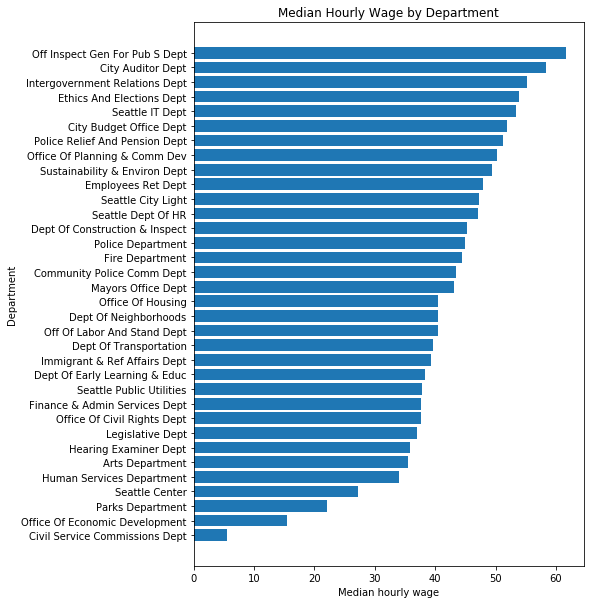

In [8]:
plt.figure(figsize=(7,10))
plt.barh(median_wages['department'], median_wages['hourly_rate'])
plt.title('Median Hourly Wage by Department')
plt.ylabel('Department')
plt.xlabel('Median hourly wage');

## What Are The Most Common Types Of Crime In 2018 And How Often Do They Occur?

URL: https://data.seattle.gov/Public-Safety/Crime-Data/4fs7-3vj5

API: https://data.seattle.gov/resource/xurz-654a.json

In [9]:
# This contains really old data, so we'll filter reported_date to just 2018
crime_url = 'https://data.seattle.gov/resource/xurz-654a.json?$where=reported_date >= "2018-01-01" \
             order by reported_date limit 50000'
seattle_crime = open_data_to_df(crime_url)
seattle_crime['reported_date'] = pd.to_datetime(seattle_crime['reported_date'])
seattle_crime.head()

,beat,crime_description,crime_subcategory,go_number,neighborhood,occ_datetime,occ_time,precinct,reported_date,reported_time,sector
0,B3,TRESPASS,TRESPASS,20180000534,WALLINGFORD,2018-01-01T00:00:00.000,1217,NORTH,2018-01-01,1217,B
1,F3,BURGLARY-FORCE-RES,BURGLARY-RESIDENTIAL,20180000666,HIGHLAND PARK,2017-12-29T00:00:00.000,2130,SOUTHWEST,2018-01-01,1421,F
2,M3,CHILD-OTHER,FAMILY OFFENSE-NONVIOLENT,20180000664,DOWNTOWN COMMERCIAL,2018-01-01T00:00:00.000,1419,WEST,2018-01-01,1419,M
3,M3,THEFT-SHOPLIFT,THEFT-SHOPLIFT,20180000840,DOWNTOWN COMMERCIAL,2018-01-01T00:00:00.000,1715,WEST,2018-01-01,1720,M
4,M3,THEFT-SHOPLIFT,THEFT-SHOPLIFT,20180000857,DOWNTOWN COMMERCIAL,2018-01-01T00:00:00.000,1500,WEST,2018-01-01,1742,M


In [10]:
# Prepare data for plotting
crime = seattle_crime[['crime_description', 'precinct']].groupby('crime_description').count().reset_index()\
        .sort_values('precinct', ascending=False)[:10]
crime.columns = ['crime_description', 'count']
crime

,crime_description,count
103,THEFT-CARPROWL,8559
110,THEFT-SHOPLIFT,3707
107,THEFT-OTH,3448
111,TRESPASS,2507
112,VEH-THEFT-AUTO,2504
18,BURGLARY-FORCE-RES,1418
102,THEFT-BUILDING,1385
22,BURGLARY-SECURE PARKING-RES,1215
20,BURGLARY-NOFORCE-RES,1206
17,BURGLARY-FORCE-NONRES,1197


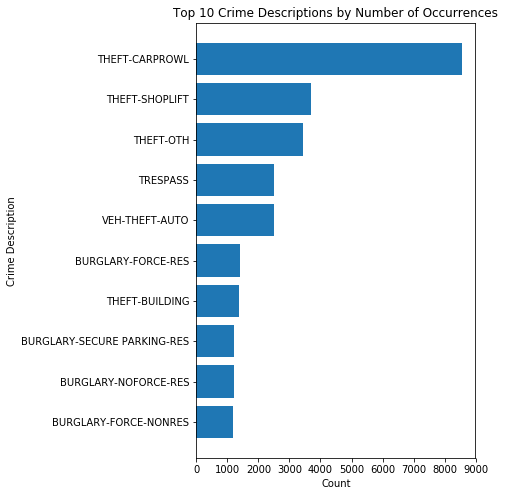

In [11]:
plt.figure(figsize=(5,8))
plt.barh(crime['crime_description'][::-1], crime['count'][::-1])
plt.title('Top 10 Crime Descriptions by Number of Occurrences')
plt.ylabel('Crime Description')
plt.xlabel('Count');

## What Departments Have The Largest Budgets In 2018?

URL: https://data.seattle.gov/dataset/City-of-Seattle-Operating-Budget/8u2j-imqx

API: https://data.seattle.gov/resource/4fzy-5niz.json

In [12]:
# Filter to 2018
budget_url = 'https://data.seattle.gov/resource/4fzy-5niz.json?fiscal_year=2018'
seattle_budget = open_data_to_df(budget_url)
seattle_budget['approved_amount'] = pd.to_numeric(seattle_budget['approved_amount'])
seattle_budget.head(3)

,approved_amount,department,description,expense_category,expense_type,fiscal_year,fund,fund_type,program,service
0,35709706,Transportation,City Central Costs,City Central Costs,Operating Expense,2018,General Fund,Tax-Supported Fund,General Expense,Utilities & Transportation
1,31548714,Library,Programs and Services - Central and Branch Ope...,Programs and Services - Central and Branch Ope...,Operating Expense,2018,General Fund,Tax-Supported Fund,Library Programs and Services,"Arts, Culture & Recreation"
2,630000,Firefighters Pension,Administration,Administration,Operating Expense,2018,General Fund,Tax-Supported Fund,Firefighters' Pension,Public Safety


In [13]:
# Seattle's 2018 budget is $6B
print("Seattle's 2018 budget is $", seattle_budget['approved_amount'].sum())

Seattle's 2018 budget is $ 6009434024


In [14]:
seattle_budget_top_10 = seattle_budget[['department', 'approved_amount']].groupby('department').sum() \
                .reset_index().sort_values('approved_amount', ascending=False)[:10]
seattle_budget_top_10

,department,approved_amount
6,City Light,1409510990
46,Public Utilities,1167669094
20,Finance General,541389234
52,Transportation,477874991
44,Police,331321865
42,Personnel Compensation Trust Funds,263889348
29,Information Technology,253008449
22,Fire,212163674
21,Finance and Administrative Services,206486268
27,Human Services,176512901


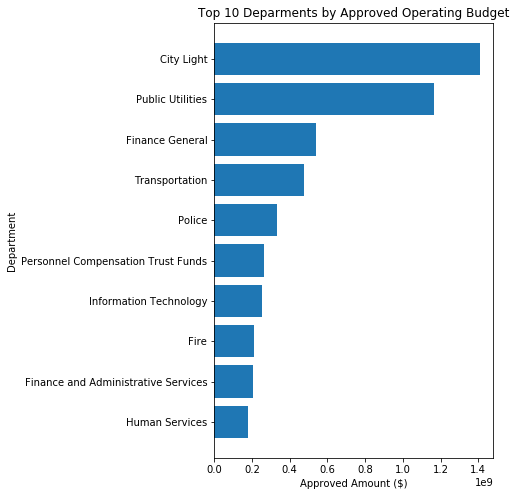

In [15]:
plt.figure(figsize=(5,8))
plt.barh(seattle_budget_top_10['department'][::-1], seattle_budget_top_10['approved_amount'][::-1])
plt.title('Top 10 Deparments by Approved Operating Budget')
plt.ylabel('Department')
plt.xlabel('Approved Amount ($)');

## How Has Seattle's Overall Budget Grown Over The Last Several Years?

In [16]:
# Example using SoQL to filter results
yearly_budget_url = 'https://data.seattle.gov/resource/4fzy-5niz.json?$select=fiscal_year, \
                   sum(approved_amount) as approved_amount\
                   where fiscal_year between 2010 and 2018 \
                   group by fiscal_year \
                   order by fiscal_year'
yearly_budget = open_data_to_df(yearly_budget_url)

# Convert approved_amount from string to numeric
yearly_budget['approved_amount'] = pd.to_numeric(yearly_budget['approved_amount'])
yearly_budget.head(10)

,approved_amount,fiscal_year
0,4.134111e+09,2010
1,4.122833e+09,2011
2,4.232593e+09,2012
3,4.323996e+09,2013
4,4.722631e+09,2014
5,5.139204e+09,2015
6,5.405327e+09,2016
7,5.705451e+09,2017
8,6.009434e+09,2018


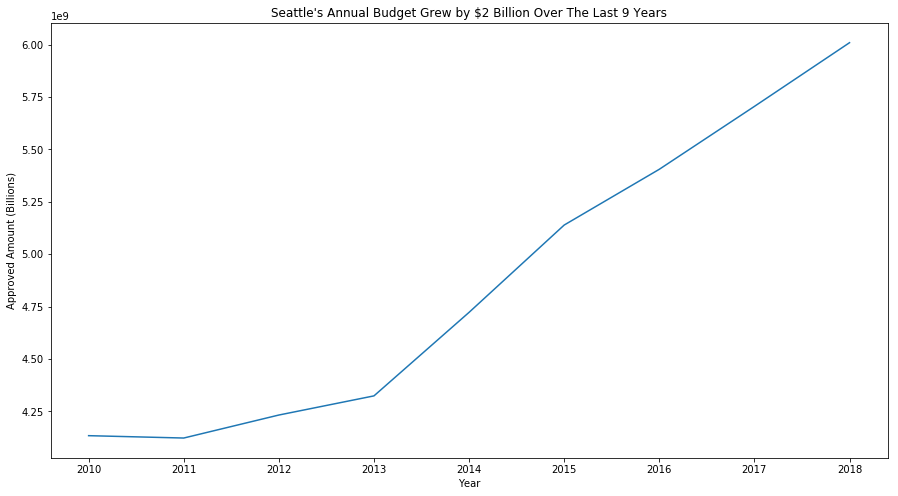

In [17]:
plt.figure(figsize=(15,8))
plt.plot(yearly_budget['fiscal_year'], yearly_budget['approved_amount'])
plt.title("Seattle's Annual Budget Grew by $2 Billion Over The Last 9 Years")
plt.xlabel('Year')
plt.ylabel('Approved Amount (Billions)');

# Conclusion

Hopefully you've found that working with APIs can be a fun process that unlocks numerous new data sources! With a little practice, the syntax and filtering will become second nature. Push yourself to try out a new API and dive into its documentation!